In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [1]:
import tensorflow as tf
tf.__version__

'2.17.0'

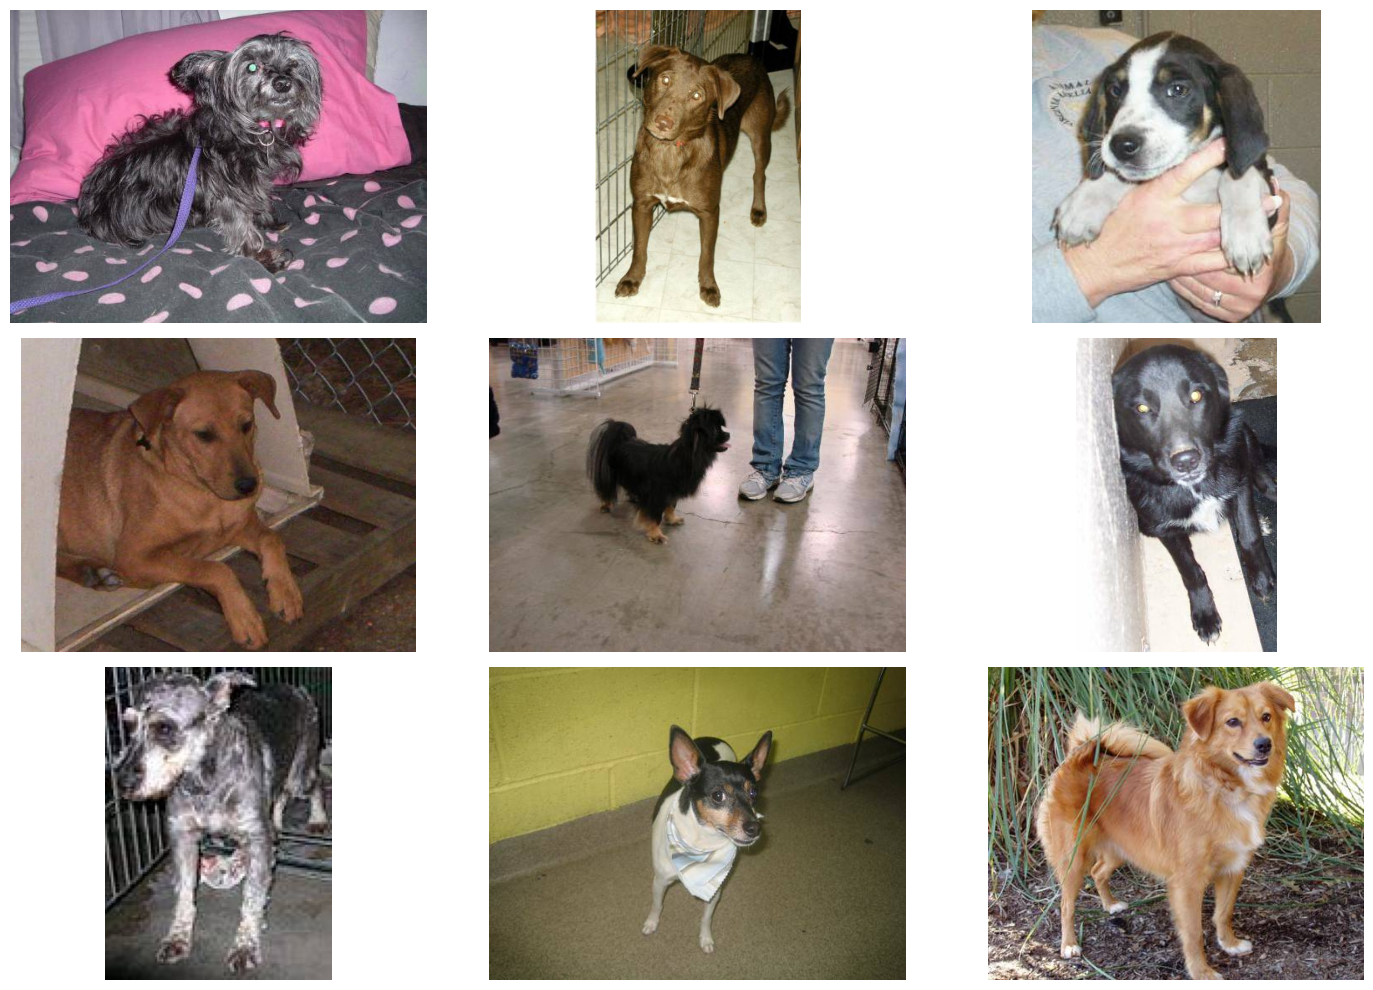

In [17]:
train_path = '../data/raw/train'
train_dogs = f'{train_path}/dog'
dog_files = [file for file in os.listdir(train_dogs)]

dog_images = []
for file in dog_files[:9]:
    img_array = image.img_to_array(image.load_img(f'{train_dogs}/{file}'))
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

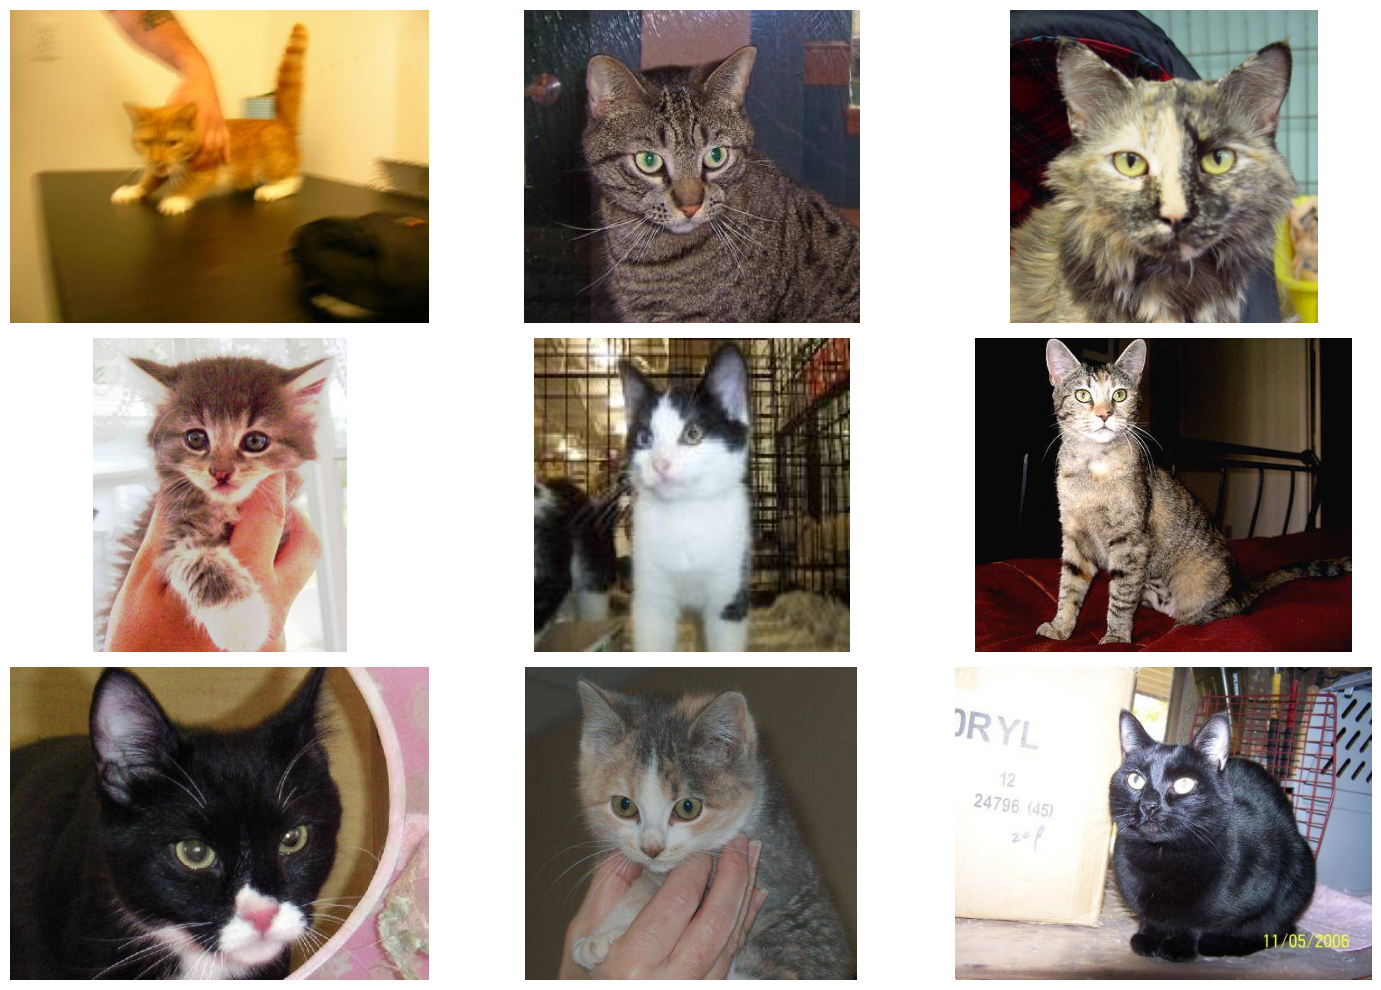

In [19]:
train_cats = f'{train_path}/cat'
cat_files = [file for file in os.listdir(train_cats)]

cat_images = []
for file in cat_files[:9]:
    img_array = image.img_to_array(image.load_img(f'{train_cats}/{file}'))
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [37]:
datagen = ImageDataGenerator()

train = datagen.flow_from_directory(
    train_path,
    target_size=(200, 200), # As requested in the instructions
    classes=['dog', 'cat'],
    batch_size=8, 
    class_mode='sparse'
)

test_path = '../data/raw'

test = datagen.flow_from_directory(
    test_path,
    target_size=(200, 200), # As requested in the instructions
    classes=["test1"],
    batch_size=8, 
    class_mode='sparse'
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


### Model Training 

In [40]:
model = Sequential()

model.add(Input(shape = (200,200,3)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [42]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

In [56]:
model.fit(train, epochs=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 11491s 15s/step - accuracy: 0.5062 - loss: 109.5331


In [50]:
checkpoint = ModelCheckpoint("../models/model.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train, steps_per_epoch = 100, validation_data = test, validation_steps = 10, epochs = 3)

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 411s 4s/step - accuracy: 0.5159 - loss: 0.6935 - val_accuracy: 0.0000e+00 - val_loss: 0.7168
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.5112 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6933
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.4681 - loss: 0.6934 - val_accuracy: 0.0000e+00 - val_loss: 0.6939


### Presenting the Results

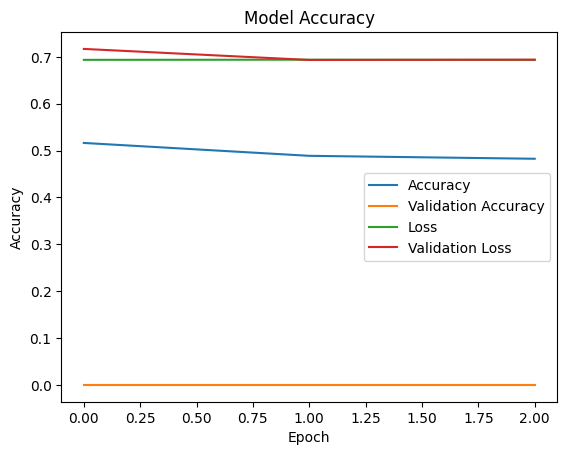

In [53]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()